<h2 style="font-weight:bold">OO.- Concepto</h2>

<p style="font-weight:bold;color:red">
    Lorem Ipsum Dolor Sit Amet...
</p>

<h2 style="font-weight:bold">01.- Justificación del proyecto</h2>

<p style="font-weight:bold;color:red">
    Lorem Ipsum Dolor Sit Amet...
</p>

<h2 style="font-weight:bold">01.1.- Alcance del proyecto</h2>

<p>Este proyecto es una versión que tiene las opciones básicas para la administración de una plataforma de bodas. Le permite al usuario conocer nuestros servicios, realizar consultas, ver sus consultas en tiempo real, registrarse en nuestro sitio web. De parte del administrador este puede subir nuevos elemento a la página web de forma simple, ver las consultas de los clientes y responder a estas así como crear eventos y subir documentos importantes para los usuarios.</p>

<h2 style="font-weight:bold">01.2.- Público al que va enfocado el proyecto.</h2>

<p style="color:orange">Para este proyecto hemos utilizado las siguientes tecnologias</p>

<ul>
    <li>Novios</li>
    <li>Familias</li>
    <li>Aventureros</li>
</ul>

<h2 style="font-weight:bold">01.3.- ¿Por qué he elegido este proyecto?</h2>


<p style="font-weight:bold;color:red">
    Elegí este proyecto porque....
</p>

<h2 style="font-weight:bold">02.- Tecnologías utilizadas</h2>

<p style="color:orange">Para este proyecto hemos utilizado las siguientes tecnologias</p>

<ol>
	<li>CMD</li>
	<li>PowerShell</li>
	<li>Nginx</li>
    <li>
        <span>Python</span>
        <ul>
            <li>SQLAlchemy</li>
            <li>Flask</li>
			<li>Jinja</li>
        </ul>
    </li>
    <li>PostgreSQL</li>
    <li>HTML5</li>
    <li>JavaScript</li>
    <li>
        <span>CSS3</span>
        <ul>
            <li>Bootstrap 5</li>
        </ul>
    </li>
	<li>Git</li>
	<li>GitHub</li>
	<li>Visual Studio Code</li>
</ol>


<h2 style="font-weight:bold">03.- Ingeniería del software</h2>

<p style="font-weight:bold;color:yellow">
    Investigar que va aquí
</p>

<h2 style="font-weight:bold">03.1.- Bases de datos: Modelo Entidad Relación</h2>

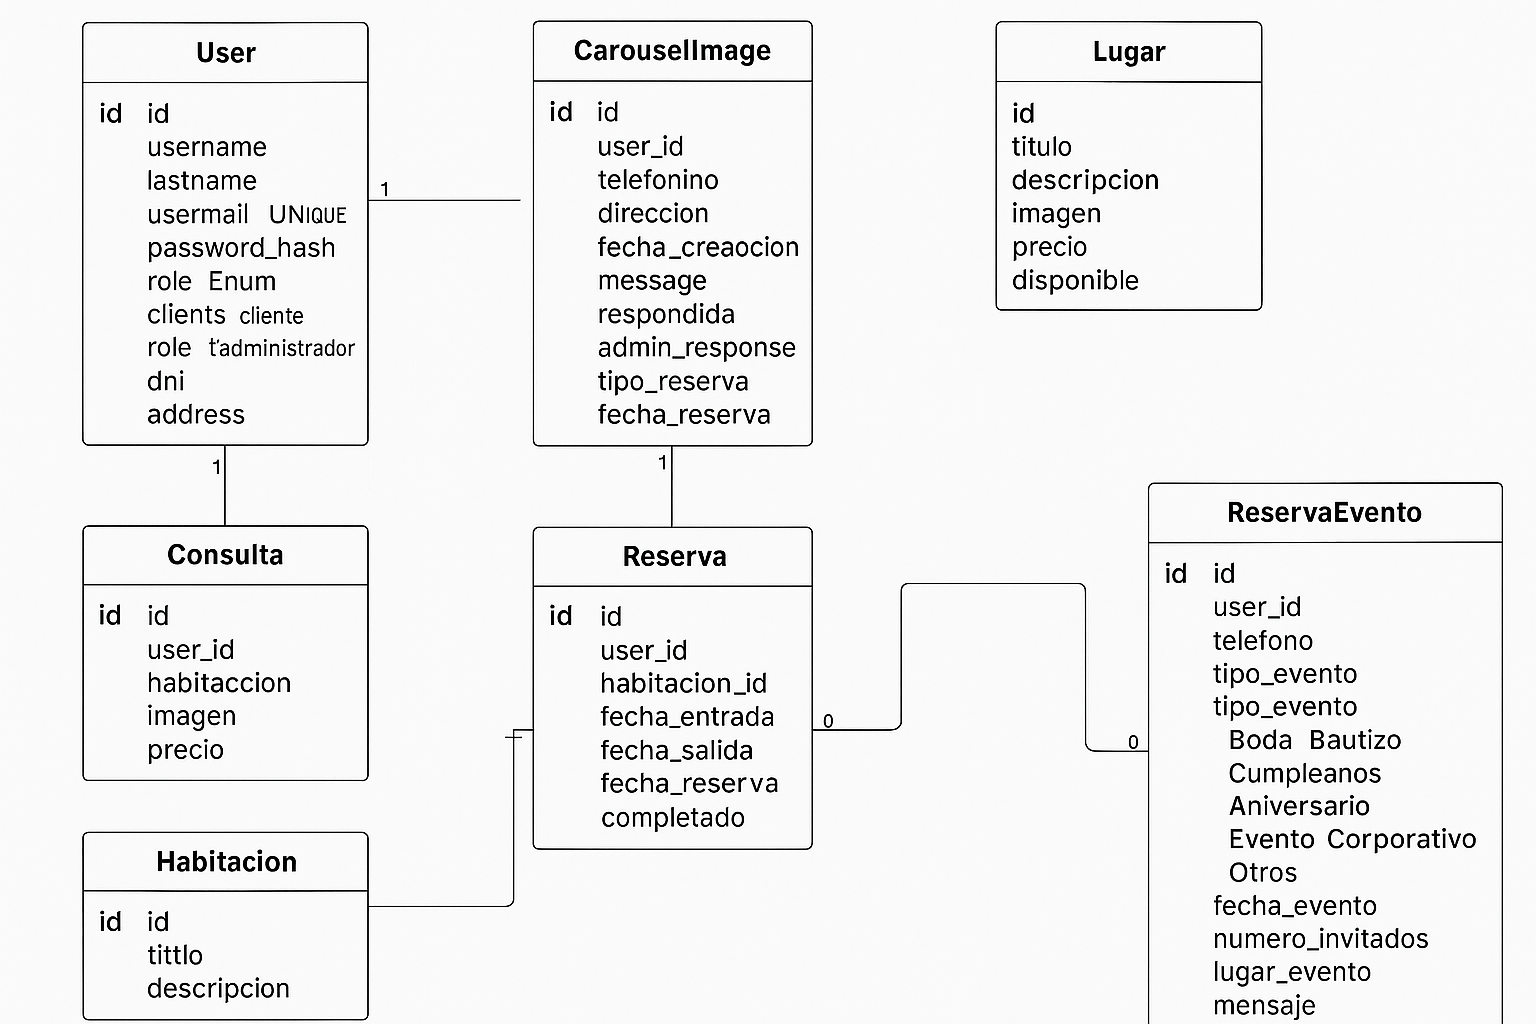

<h2 style="font-weight:bold">03.2.- Bases de datos: Paso a tablas</h2>

<p><strong>USUARIOS</strong> (<strong>PK</strong> ID, USERNAME, LASTNAME, USERMAIL, PHONE_NUMBER, PASSWORD_HASH, ROLE, BIRTHDAY, DNI, ADDRESS)</p>

<p><strong>CONSULTAS</strong> (<strong>PK</strong> ID, <strong>FK</strong> USER_ID, TELEFONO, DIRECCION, CIUDAD, FECHA_CREACION, MESSAGE, RESPONDIDA, ADMIN_RESPONSE, TIPO_RESERVA, FECHA_RESERVA)</p>

<p><strong>CAROUSEL_IMAGES</strong> (<strong>PK</strong> ID, IMAGE_PATH, DESCRIPTION, IS_ACTIVE)</p>

<p><strong>LUGARES</strong> (<strong>PK</strong> ID, TITULO, DESCRIPCION, IMAGEN)</p>

<p><strong>HABITACIONES</strong> (<strong>PK</strong> ID, TITULO, DESCRIPCION, IMAGEN, PRECIO, DISPONIBLE)</p>

<p><strong>RESERVAS</strong> (<strong>PK</strong> ID, <strong>FK</strong> USER_ID, <strong>FK</strong> HABITACION_ID, FECHA_ENTRADA, FECHA_SALIDA, FECHA_RESERVA, COMPLETADO)</p>

<p><strong>RESERVAS_EVENTOS</strong> (<strong>PK</strong> ID, <strong>FK</strong> USER_ID, TELEFONO, TIPO_EVENTO, FECHA_EVENTO, NUMERO_INVITADOS, LUGAR_EVENTO, MENSAJE, FECHA_RESERVA, COMPLETADO)</p>


<h2 style="font-weight:bold">03.3.- Bases de datos: Código SQL para la creación de la base de datos</h2>

Definimos los tipos ENUM

In [ ]:
-- ENUM para roles de usuario
DO $$ BEGIN
    CREATE TYPE role_enum AS ENUM ('cliente', 'administrador');
EXCEPTION
    WHEN duplicate_object THEN NULL;
END $$;

-- ENUM para tipos de eventos
DO $$ BEGIN
    CREATE TYPE tipo_evento_enum AS ENUM (
        'Boda',
        'Bautizo',
        'Cumpleaños',
        'Aniversario',
        'Evento Corporativo',
        'Otros'
    );
EXCEPTION
    WHEN duplicate_object THEN NULL;
END $$;


In [ ]:
-- Tabla: users
CREATE TABLE users (
    id SERIAL PRIMARY KEY,
    username VARCHAR(80),
    lastname VARCHAR(80),
    usermail VARCHAR(120) UNIQUE NOT NULL,
    phone_number VARCHAR(24),
    password_hash VARCHAR(128) NOT NULL,
    role role_enum NOT NULL DEFAULT 'cliente',
    birthday DATE NOT NULL,
    dni VARCHAR(20) DEFAULT '-',
    address VARCHAR(255) DEFAULT '-'
);

-- Tabla: consultas
CREATE TABLE consultas (
    id SERIAL PRIMARY KEY,
    user_id INTEGER NOT NULL REFERENCES users(id) ON DELETE CASCADE,
    telefono VARCHAR(24),
    direccion VARCHAR(255),
    ciudad VARCHAR(100),
    fecha_creacion TIMESTAMPTZ DEFAULT CURRENT_TIMESTAMP NOT NULL,
    message TEXT,
    respondida BOOLEAN DEFAULT FALSE,
    admin_response TEXT DEFAULT '-',
    tipo_reserva VARCHAR(255) DEFAULT '-',
    fecha_reserva TIMESTAMPTZ DEFAULT CURRENT_TIMESTAMP
);

-- Tabla: carousel_images
CREATE TABLE carousel_images (
    id SERIAL PRIMARY KEY,
    image_path VARCHAR(255) NOT NULL,
    description VARCHAR(255),
    is_active BOOLEAN DEFAULT TRUE
);

-- Tabla: lugares
CREATE TABLE lugares (
    id SERIAL PRIMARY KEY,
    titulo VARCHAR(150) NOT NULL,
    descripcion TEXT,
    imagen VARCHAR(255) NOT NULL
);

-- Tabla: habitaciones
CREATE TABLE habitaciones (
    id SERIAL PRIMARY KEY,
    titulo VARCHAR(150) NOT NULL,
    descripcion TEXT,
    imagen VARCHAR(255) NOT NULL,
    precio FLOAT NOT NULL,
    disponible BOOLEAN NOT NULL DEFAULT TRUE
);

-- Tabla: reservas
CREATE TABLE reservas (
    id SERIAL PRIMARY KEY,
    user_id INTEGER NOT NULL REFERENCES users(id) ON DELETE CASCADE,
    habitacion_id INTEGER NOT NULL REFERENCES habitaciones(id) ON DELETE CASCADE,
    fecha_entrada DATE,
    fecha_salida DATE,
    fecha_reserva TIMESTAMPTZ DEFAULT CURRENT_TIMESTAMP NOT NULL,
    completado BOOLEAN DEFAULT FALSE
);

-- Tabla: reservas_eventos
CREATE TABLE reservas_eventos (
    id SERIAL PRIMARY KEY,
    user_id INTEGER NOT NULL REFERENCES users(id) ON DELETE CASCADE,
    telefono VARCHAR(24),
    tipo_evento tipo_evento_enum NOT NULL DEFAULT 'Boda',
    fecha_evento DATE NOT NULL,
    numero_invitados INTEGER NOT NULL,
    lugar_evento VARCHAR(150),
    mensaje TEXT,
    fecha_reserva TIMESTAMPTZ DEFAULT CURRENT_TIMESTAMP NOT NULL,
    completado BOOLEAN DEFAULT FALSE
);


<h2 style="font-weight:bold">03.4.- Diagrama de clases del proyecto</h2>

<p >
    Pendiente ...
</p>

<h2 style="font-weight:bold">03.5.- Diagramas de casos de uso</h2>

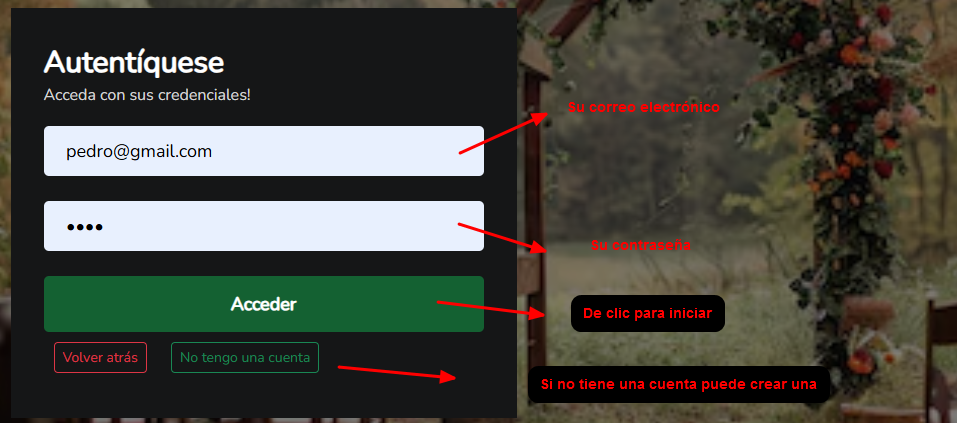

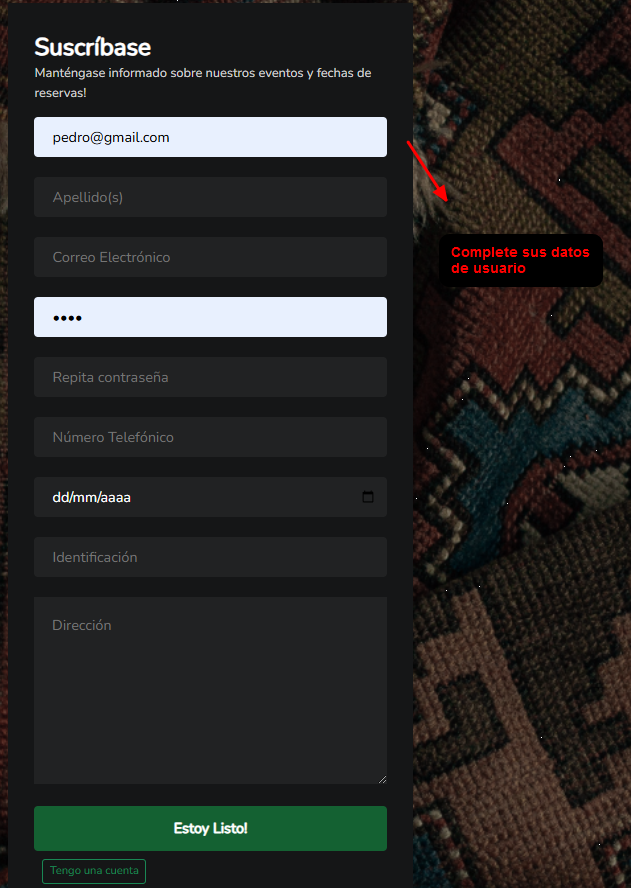

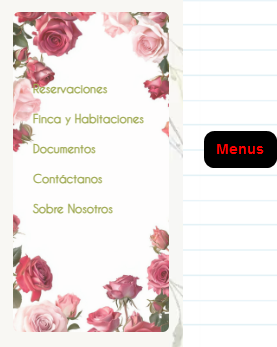

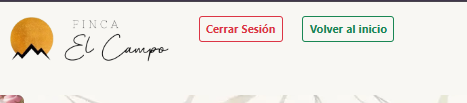

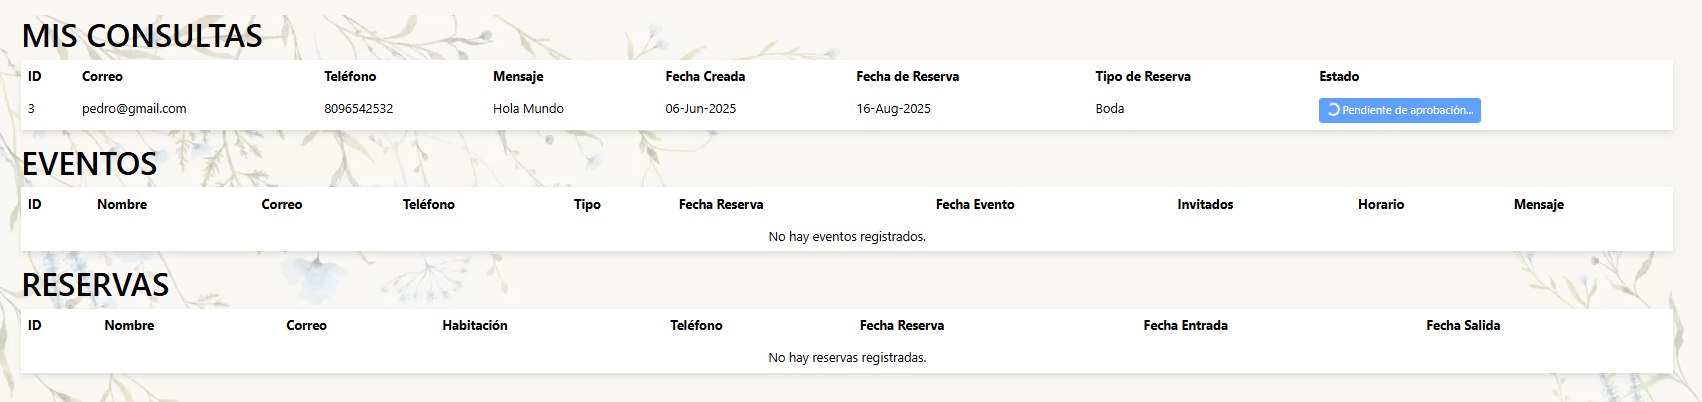

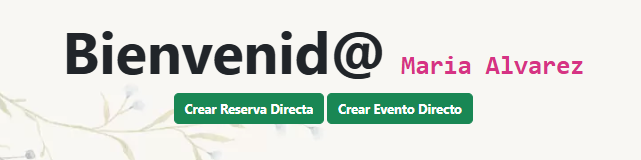

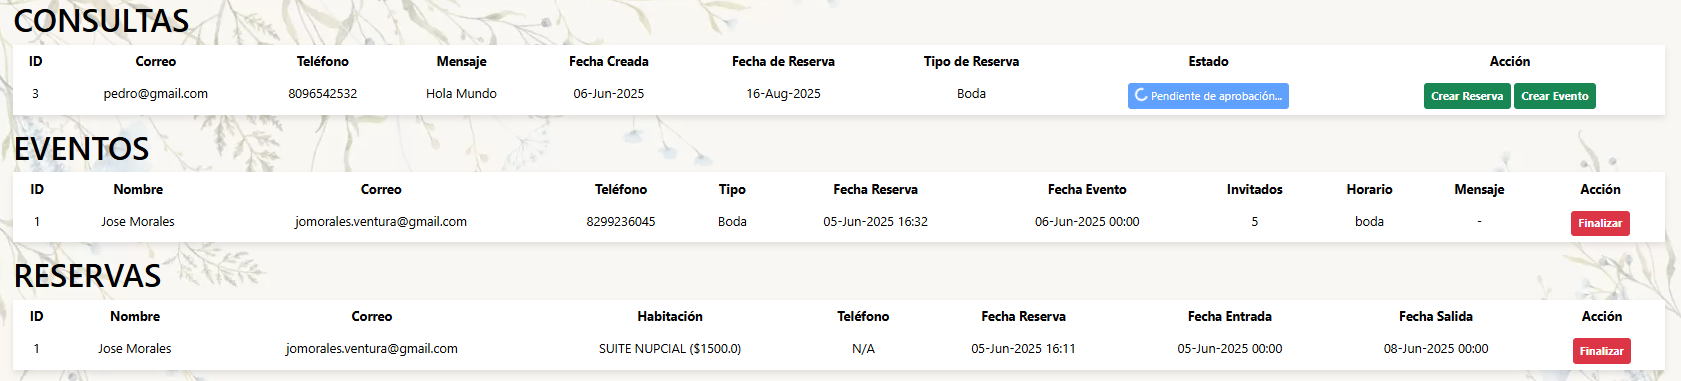

<h2 style="font-weight:bold">04.- Storyboard del proyecto</h2>

<p style="font-weight:bold;color:yellow">
    Investigar que va aquí
</p>

<h2 style="font-weight:bold">05.- Implementación del proyecto</h2>

<p style="font-weight:bold;color:yellow">
    Investigar que va aquí
</p>

<h2 style="font-weight:bold">06.- Dificultades encontradas</h2>

<p>
    Para la realización de este proyecto tuve que aprender a utilizar a GIT para lo cual me leí una guía online del autor <code>Sergio Bachiller</code> que me ayudó a aprender a subir mi proyecto a github y relacionarme con los conceptos de repositorios. Esto de GIT es bastante útil y dominarlo es muy importante.

    He tenido que aprender Python a mayor profundidad porque utilizar la libreria Flask requiere tener un gran dominio sobre la estructra de python dado que Flask es una libreria de este lenguaje. Comprender la creación de paquetes e importar modulos y el como se relacionan fue bastante complicado a pesar de ser un lenguaje sencillo.

    No fue fácil aprender a utilizar el ORM de SQlAlchemy que nos permite utilizar código python para manejar los datos de nuestra base de datos, todas las tablas son clases y por lo tanto todo es un objeto.

    Además, el motor Jinja es fenomenal, al principio no sabia como es que HTML puede mezclarse con el código de Python y mostrar contenido dinámico sin el uso de javaScript ni PHP.

    Tuve muchas dificultades para comprender que co flask mi computador se convierte en un servidor, no sabia lo que era un servidor ni como opera ni como funciona su lógica. Tuve que profundizar en lo que es
    NGINX , Apache y CGI Gateway para luego ver su relación con Python. Comprender el manejo de los puertos fue un dolor de cabeza, no entendía esta lógica.

    Fue complejo aprender a utilizar las macros en flask para crear componentes reutilizables, diseñar la página web fue complejo aunque tomamos una página personal como referencia para replicar.

    Otra cosa tediosa fue hacer que el sitio sea responsive y crear animaciones CSS.
</p>

<h2 style="font-weight:bold">07.- Cronograma de tiempo empleado - Diseño de base de datos</h2>

| **Fase / Actividad**                 | **Duración Estimada** | **Fecha de Inicio** | **Fecha de Fin** | **Comentarios**                      |
| ------------------------------------ | --------------------- | ------------------- | ---------------- | ------------------------------------ |
| 1. Recolección de requisitos         | 3 días                | 01/05/2025          | 03/05/2025       | -                                    |
| 2. Análisis de requisitos            | 2 días                | 04/05/2025          | 05/05/2025       | -                                    |
| 3. Diseño conceptual (Modelo ER)     | 3 días                | 06/05/2025          | 08/05/2025       | -                                    |
| 4. Diseño lógico (Modelo Relacional) | 2 días                | 09/05/2025          | 10/05/2025       | Normalización y definición de tablas |
| 5. Diseño físico                     | 2 días                | 11/05/2025          | 12/05/2025       | Definición de índices, claves        |
| 6. Diseño Web                        | 5 días                | 13/05/2025          | 17/05/2025       | Interfaz, estructura visual          |
| 7. Diseño ORM                        | 3 días                | 18/05/2025          | 20/05/2025       | Adaptar como ORM                     |
| 8. Diseño de Funciones               | 5 días                | 21/05/2025          | 25/05/2025       | Lógica del negocio y operaciones     |

<h2 style="font-weight:bold">08.-Análisis DAFO del proyecto</h2>

<p style="font-weight:bold;color:red">
    Un análisis DAFO (también conocido como FODA o SWOT en inglés) es una herramienta estratégica que se utiliza para evaluar la situación interna y externa de una empresa, proyecto o situación para ayudar a la toma de decisiones.
</p>

<h2 style="font-weight:bold">09.- Manual de usuario</h2>

<p>
    Pendiente...
</p>

<h2 style="font-weight:bold">10.- Conclusiones</h2>

<p style="font-weight:bold;color:red">
    Lorem Ipsum Dolor Sit Amet...
</p>

<h2 style="font-weight:bold">11.- Líneas de investigación futuras</h2>

<p style="font-weight:bold;color:red">
    Lorem Ipsum Dolor Sit Amet...
</p>

<h2 style="font-weight:bold">12.- Bibliografía</h2>

<ul>
    <li> https://flask.palletsprojects.com/en/stable/ </li>
    <li> Flask Web Developing - O'Reilly - Miguel Grinberg </li>
    <li> https://www.pythontutorial.net/ </li>
    <li> https://www.w3schools.com/bootstrap5/index.php </li>
    <li> https://www.w3schools.com/html/default.asp </li>
    <li> https://www.w3schools.com/css/default.asp </li>
    <li> https://www.w3schools.com/js/default.asp </li>
    <li> https://www.w3schools.com/python/default.asp </li>
    <li> https://www.studocu.com/latam/document/universidad-popular-de-nicaragua/simulacion-de-sistemas/git-cosfera-dia-1-uso-de-git/64816524</li>
</ul>